##### Chisq LR Tests For 2 Proportions

In [ ]:
# chi-squared test for a 2x2 table (a test for the equality of 2 proportions)
#
# Use Larry Bird free throw data, Bilder, p 27
n1 <- 285
n2 <- 53
w1 <- 251
w2 <- 48

#
c.table <- array(data=c(w1,w2,n1-w1,n2-w2), dim= c(2,2),
                 dimnames=list(Group=c(1,2), Response=c(1,2)))
c.table

chisq.test(c.table, correct=FALSE)

# note that Score test gives same result in 2x2 table
prop.test(c.table,conf.level=0.95,correct=FALSE)
#


# Find the estimated pi^j; these are the ROW proportions
pi.hat.table<-c.table/rowSums(c.table)
pi.hat.table

#Check that pi^j add to 1
sum(pi.hat.table[1,])

#
# Compute likelihood ratio statistic for 2x2 table

pi.bar <- colSums(c.table)[1]/sum(c.table)
log.Lambda <- c.table[1,1]*log(pi.bar/pi.hat.table[1,1])+
  c.table[1,2]*log((1-pi.bar)/(1-pi.hat.table[1,1]))+
  c.table[2,1]*log(pi.bar/pi.hat.table[2,1])+
  c.table[2,2]*log((1-pi.bar)/(1-pi.hat.table[2,1]))
test.stat <- -2*log.Lambda

crit.val <- qchisq(p=0.95,df=1)

p.val <- 1-pchisq(q=test.stat,df=1)

round(data.frame(pi.bar,test.stat,crit.val,p.val,
                 row.names=NULL),4)

In [1]:
# Child-Parent smoking data
# Create a rectangular file of the data with one row for each child
# Start with a matrix of the counts

a <- matrix(c(188,1168,416,1823,400,1380),
            nrow = 2)
a; #the data table

# now create the data file

x <- c(rep(0,188+1168),
       rep(1,416+1823),
       rep(2,400+1380))

y <- c(rep(1,188),rep(0,1168),
       rep(1,416),rep(0,1823),
       rep(1,400),rep(0,1380))

table(y,x)

cor(x,y)

M.sq <- (5375-1)*cor(x,y)^2

M.sq

pchisq(M.sq,1,lower.tail=F)




#check the data set
ds <- data.frame(x,y)
head(ds)
tail(ds)
dim(ds)
str(ds)

188,416,400
1168,1823,1380


   x
y      0    1    2
  0 1168 1823 1380
  1  188  416  400

[1] 0.08343972

[1] 37.4148

[1] 9.549493e-10

x,y
0,1
0,1
0,1
0,1
0,1
0,1


,x,y
5370,2,0
5371,2,0
5372,2,0
5373,2,0
5374,2,0
5375,2,0


[1] 5375    2

'data.frame':	5375 obs. of  2 variables:
 $ x: num  0 0 0 0 0 0 0 0 0 0 ...
 $ y: num  1 1 1 1 1 1 1 1 1 1 ...


##### Simple Linear Regression Model 

[1] 40  2

[1] "FootLength" "Height"

FootLength,Height
8.50,57
10.25,66
9.25,64
9.75,69
9.50,64
9.00,63


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.500   9.000   9.375   9.369   9.562  10.500 

[1] 0.5310473

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  57.00   63.00   64.00   64.72   67.00   69.00 

[1] 2.68889

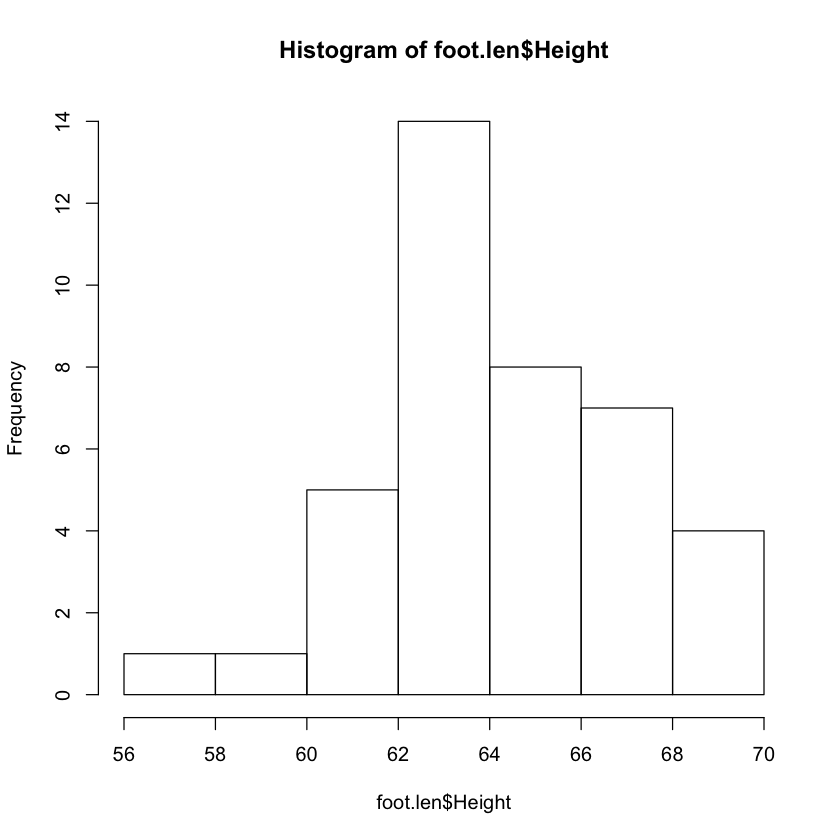

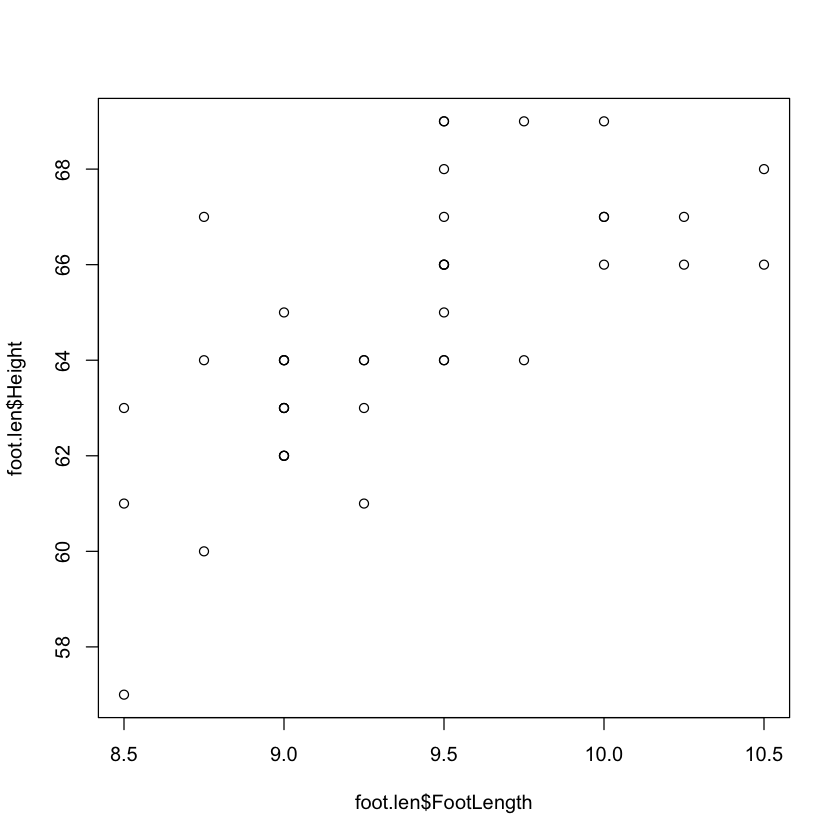

[1] 0.6833689

[1] 0.68


Call:
lm(formula = Height ~ FootLength, data = foot.len)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7190 -1.2129 -0.3141  0.9359  4.4160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.3077     5.6270   5.742 1.29e-06 ***
FootLength    3.4602     0.5997   5.770 1.18e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.989 on 38 degrees of freedom
Multiple R-squared:  0.467,	Adjusted R-squared:  0.453 
F-statistic: 33.29 on 1 and 38 DF,  p-value: 1.177e-06


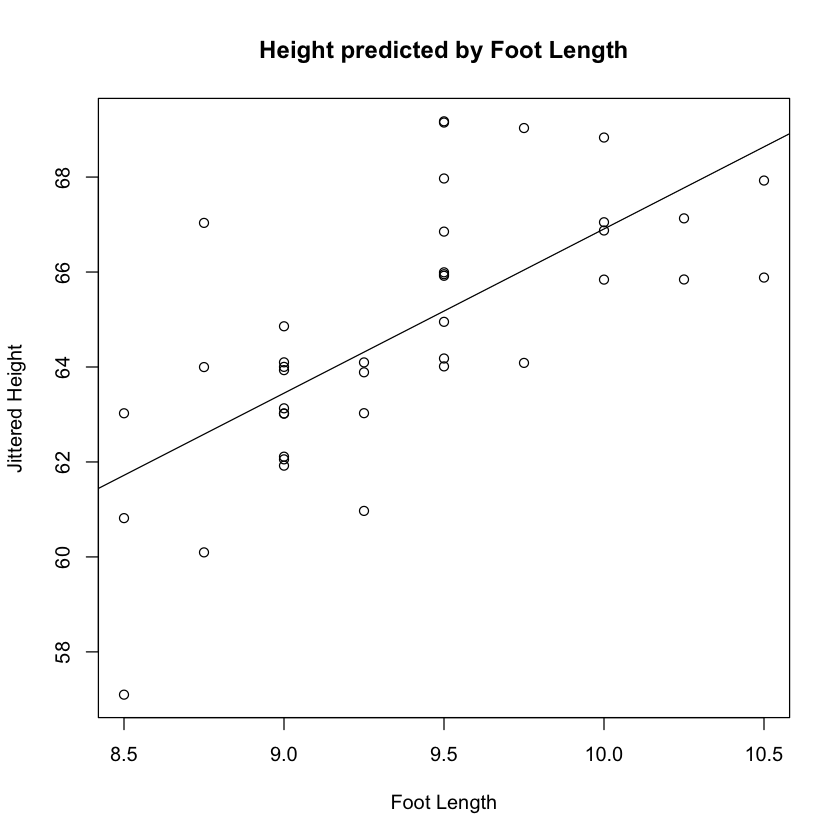

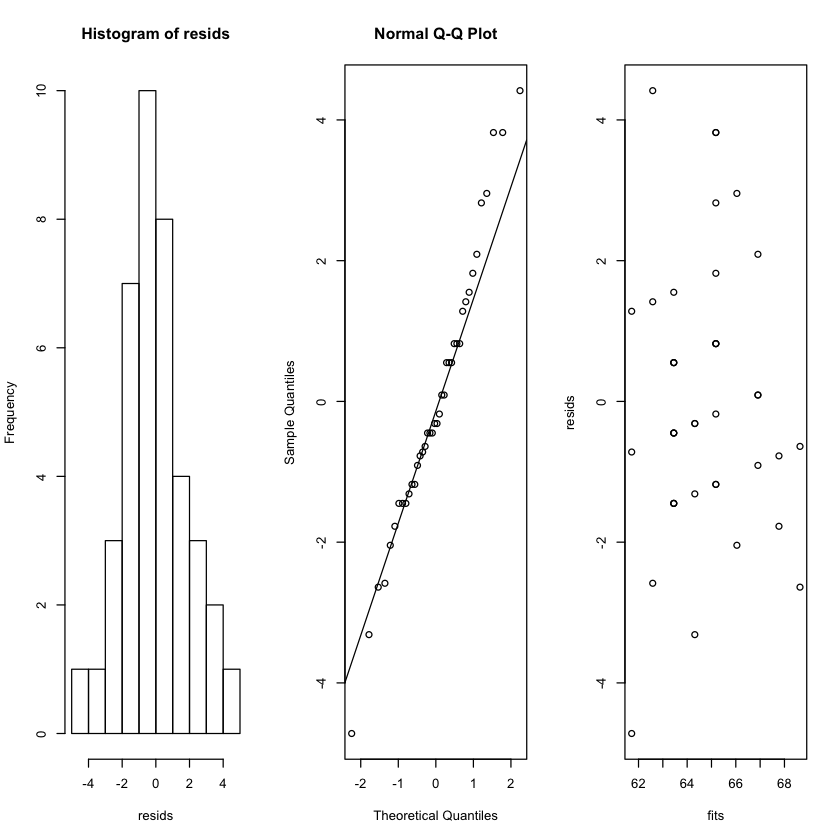

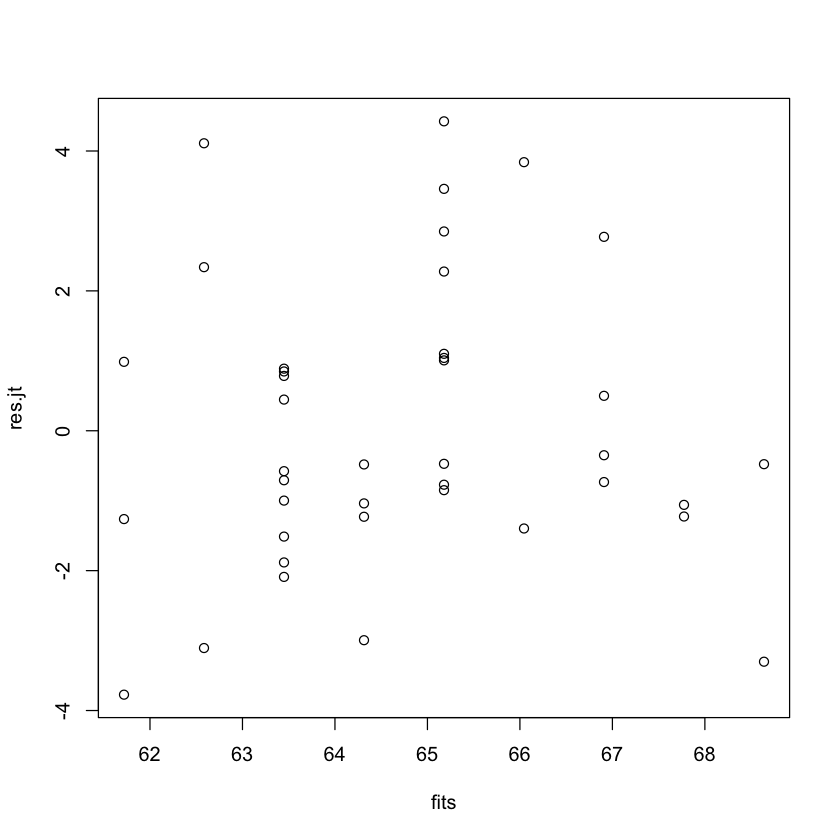

,FootLength,Height,id,fits,stdres
1,8.50,57,1,61.71899,-2.492382
28,8.75,67,28,62.58403,2.290014


1        2 
59.98892 63.44907

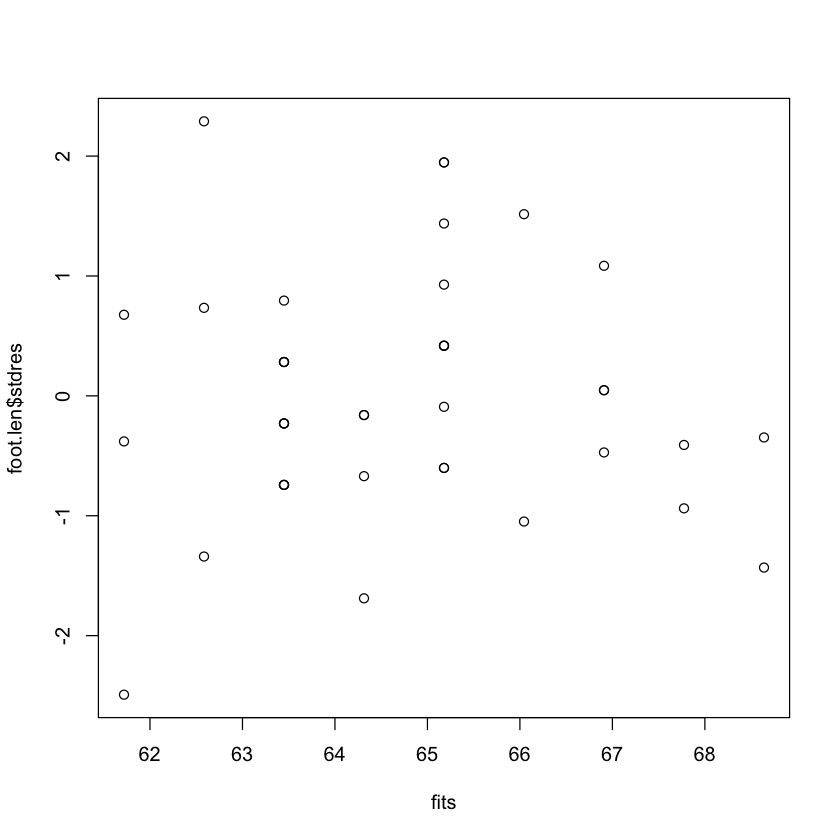

In [4]:
# Simple Linear Regression Model of Height = f(Foot Length)
library("MASS")
foot.len <- read.csv("FootLength.csv")
dim(foot.len)
names(foot.len)
head(foot.len)

# create an ID variable
foot.len$id =seq(1:40)

#Display variables

summary(foot.len$FootLength)
sd(foot.len$FootLength)
summary(foot.len$Height)
sd(foot.len$Height)
hist(foot.len$Height)
plot(foot.len$FootLength,foot.len$Height)

# jitter data to see each observation
plot(foot.len$FootLength,jitter(foot.len$Height),main="Height predicted by Foot Length",
     ylab="Jittered Height",xlab="Foot Length")

# measure the association
cor(foot.len$FootLength,foot.len$Height)
round(cor(foot.len$FootLength, foot.len$Height),2)

# add regression line to plot
abline(lm(foot.len$Height~foot.len$FootLength))

# summarize regression line
reg.mod <- lm(Height~FootLength,data=foot.len)
summary(reg.mod)


#Check the residual plots
par(mfrow=c(1,3))
resids=residuals(lm(Height~FootLength,data=foot.len))
fits=predict(lm(Height~FootLength,data=foot.len))
hist(resids)
qqnorm(resids)
qqline(resids)       
plot(fits,resids)

#jitter residuals for better visualization
par(mfrow=c(1,1))
res.jt <-jitter(resids, factor=1, amount=1)
plot(fits,res.jt)

# compute the standardized residuals and 
# save fits and stdres in the dataframe
foot.len$fits <-predict(lm(Height~FootLength,data=foot.len))
foot.len$stdres <- stdres(reg.mod)
plot(fits,foot.len$stdres)

# find outliers (obs with stdres > |2|)

new.df <- foot.len[which(foot.len$stdres < -2 |
                          foot.len$stdres > 2),]
new.df

#predicting y for a given x
new <- data.frame(FootLength = c(8, 9))
predict(lm(Height~FootLength,data=foot.len), new)

##### Example: Snoring and Heart Disease, Example 3.2.2, Agresti p 69

24,1355
35,603
21,192
30,224


   y
x      0    1
  0 1355   24
  2  603   35
  4  192   21
  5  224   30

Snoring,HeartDisease
0,1
0,1
0,1
0,1
0,1
0,1


,Snoring,HeartDisease
2479,5,0
2480,5,0
2481,5,0
2482,5,0
2483,5,0
2484,5,0



Call:  glm(formula = HeartDisease ~ Snoring, family = gaussian, data = ds)

Coefficients:
(Intercept)      Snoring  
    0.01687      0.02004  

Degrees of Freedom: 2483 Total (i.e. Null);  2482 Residual
Null Deviance:	    105.1 
Residual Deviance: 102.1 	AIC: -874

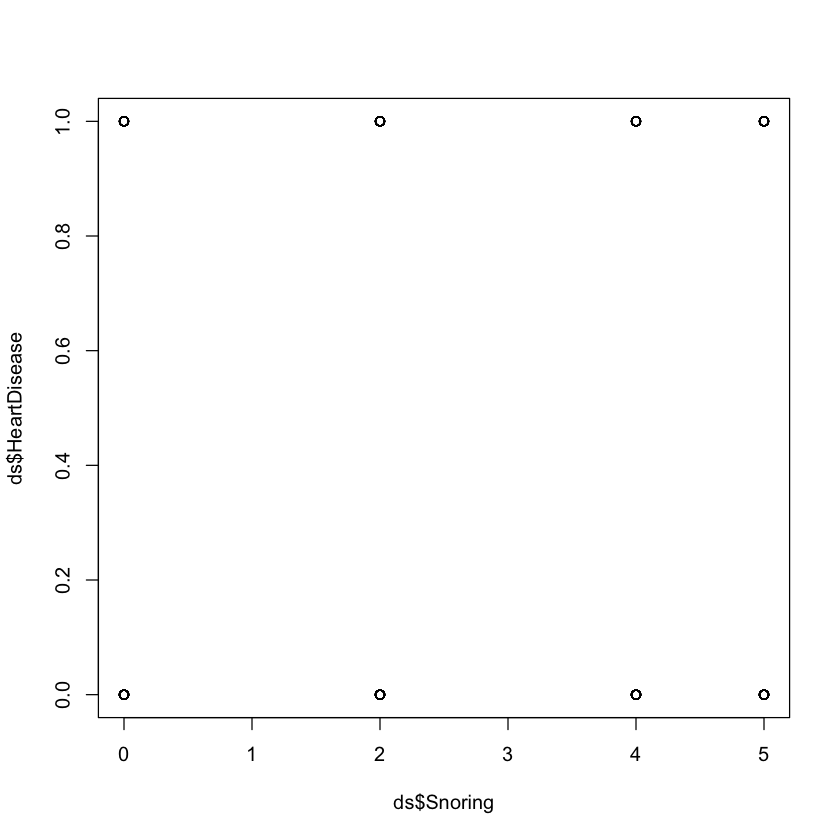


Call:  glm(formula = HeartDisease ~ ds$Snoring, family = binomial, data = ds)

Coefficients:
(Intercept)   ds$Snoring  
    -3.8662       0.3973  

Degrees of Freedom: 2483 Total (i.e. Null);  2482 Residual
Null Deviance:	    900.8 
Residual Deviance: 837.7 	AIC: 841.7


Call:
lm(formula = ds$HeartDisease ~ ds$Snoring)

Coefficients:
(Intercept)   ds$Snoring  
    0.01687      0.02004  



Call:  glm(formula = HeartDisease ~ ds$Snoring, family = binomial(link = "probit"), 
    data = ds)

Coefficients:
(Intercept)   ds$Snoring  
    -2.0606       0.1878  

Degrees of Freedom: 2483 Total (i.e. Null);  2482 Residual
Null Deviance:	    900.8 
Residual Deviance: 836.8 	AIC: 840.8

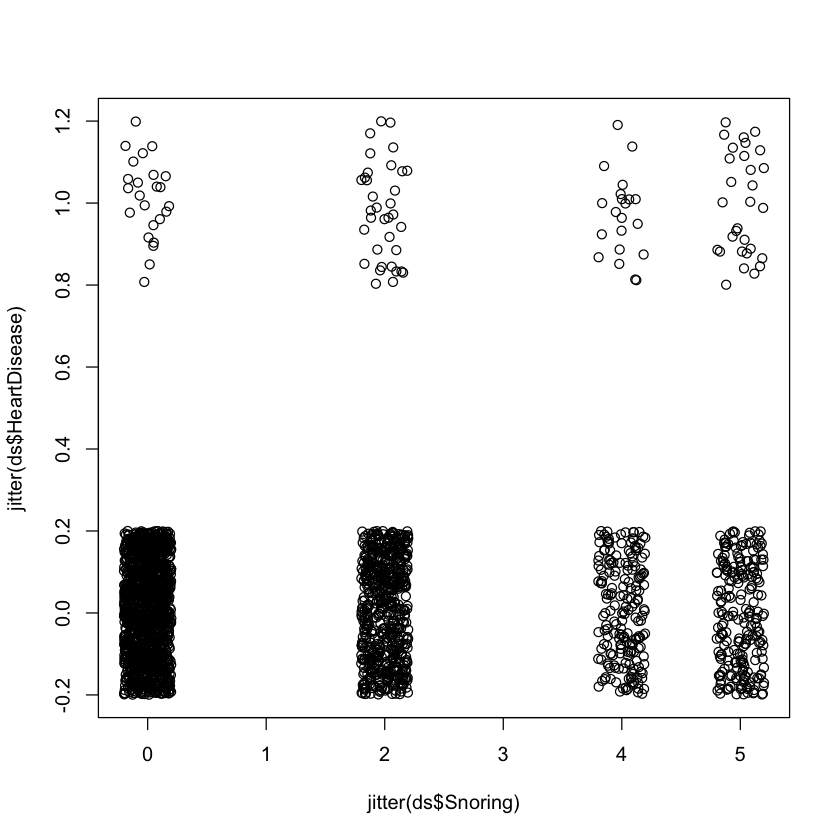

In [6]:
# Example: Snoring and Heart Disease, Example 3.2.2, Agresti p 69
# posted on canvas 3-14-19

a <- matrix(c(24,35,21,30,1355,603,192,224), ncol = 2)
a

# Data from Table 3.1 p 69
x <- c(rep(0, 24+1355),
       rep(2, 35+603),
       rep(4, 21+192),
       rep(5, 30+224))

y <- c(rep(1, 24), rep(0, 1355),
       rep(1, 35), rep(0, 603),
       rep(1, 21), rep(0, 192),
       rep(1, 30), rep(0, 224))

table(x,y)

# Rename variables for use in Example 3,2,2, page 69, Agresti
HeartDisease <- y
Snoring <- x

ds <- data.frame(Snoring, HeartDisease)
head(ds)
tail(ds)

# As Gaussian linear model
glm(HeartDisease~Snoring,family=gaussian,data=ds)
#

# graph data
par(mfrow=c(1,1))
plot(ds$Snoring,ds$HeartDisease)
plot(jitter(ds$Snoring),jitter(ds$HeartDisease))
#

# As Binomial glm model
glm(HeartDisease~ds$Snoring,family=binomial,ds); # Agresti p 71
#

# Ex 3.2.2 p. 69 as a linear model using lm()
lm(ds$HeartDisease~ds$Snoring)
#

# As Probit glm model
glm(HeartDisease~ds$Snoring,family=binomial
    (link="probit"),ds)
#